###### Note:- The main purpose is to apply Logistic Regression Model to predict ,if the person will pass a hearing test or no depending on age , physical score 
###### Data copyright by Pierian Data Inc.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/HassanKotb/Logistic_Regression_Hearing_Test/main/Hearing_Test.csv')

In [3]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


###### Discovering the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

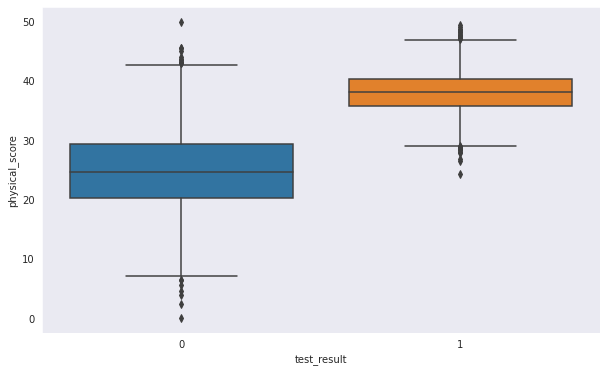

In [5]:
sns.set_style('dark')
plt.figure(figsize= (10,6))
sns.boxplot(x='test_result',y='physical_score',data = df)


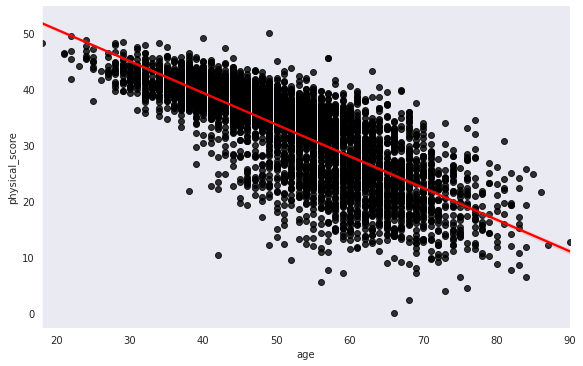

In [6]:
sns.lmplot(x='age',y='physical_score',data = df,line_kws={'color':'r'},scatter_kws={'color':'k'},
           aspect=1.6)
    

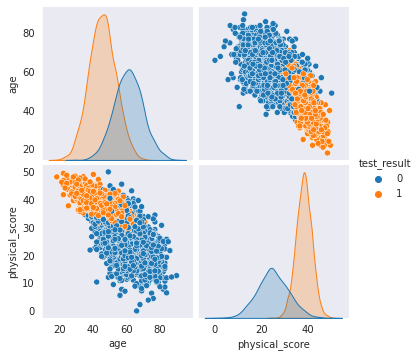

In [7]:
sns.pairplot(df,diag_kind='kde',hue='test_result')

In [8]:
cor = df.corr()

<AxesSubplot:>

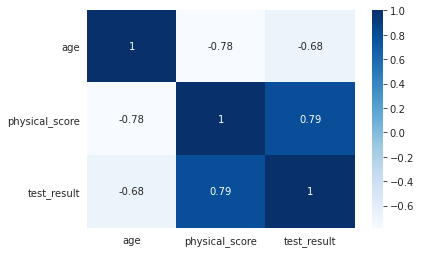

In [9]:
sns.heatmap(cor,cmap='Blues',annot=True)

In [10]:
# Spacify the features and label
X=df.drop('test_result',axis=1)
y=df.test_result

In [11]:
# Spliting the data into training-set and test-set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [ ]:
# Standardize the features to avoid different units issue 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
Scaled_X_train = sc.transform(X_train)
Scaled_X_test = sc.transform(X_test)

In [12]:
# importing the Logistic Regression model and set it to default
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [14]:
# fitting the model to the training scaled data
log_model.fit(Scaled_X_train,y_train)

LogisticRegression()

In [17]:
# predict the test-set
y_pred = log_model.predict(Scaled_X_test)

##### we can evaluate the model by deffirent ways 

In [19]:
# 1- the model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93

In [21]:
# model accuracy seems to be 93% 
#but lets check the classes balance to check if we have a accuracy paradox
df.test_result.value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [22]:
# it seems that the classes are more likly to be balanced 

In [23]:
# 2- Recall metrics 
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.9543973941368078

In [25]:
# 2- Precision metrics 
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.9331210191082803

In [28]:
# To show Accuracy , Recall and Precision all together
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



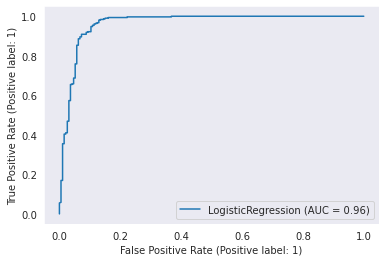

In [32]:
# 3- ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,Scaled_X_test,y_test)
